In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (16,12)

# Weather in Z&uuml;rich (Fluntern Station)
## Federal Office of Meteorology and Climatology MeteoSwiss
#### Altitude: 556 m, Coordinates 47<sup>o</sup> 22.7' N / 8<sup>o</sup> 33.9' E

| Measurement | Reference date <br>of homogenization | Last inhomgeneity <br>provisionally corrected |
| ---: | :---: | :--- |
|Temperature | 01.12.2009 | yes|
|Precipitaton| 01.12.2009 | no |

In [4]:
with open("data/homog_mo_SMA.txt", 'r') as f:
    lines = f.readlines()

In [5]:
clean_line = lambda line: re.sub("\s+", ',', line.strip('\n').strip())
header = clean_line(lines.pop(0))
all_clean = [clean_line(line).split(',') for line in lines]

In [6]:
data = pd.DataFrame(all_clean, columns=header.split(','))
data = data.assign(Year = data.Year.apply(int))
data = data.assign(Month = data.Month.apply(int))
data = data.assign(Temperature = data.Temperature.apply(float))
data = data.assign(Precipitation = data.Precipitation.apply(float))

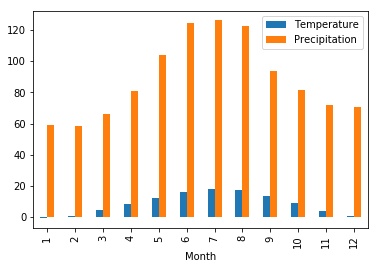

In [7]:
data.set_index('Year').groupby('Month').mean().plot.bar()
None

In [8]:
with open("data/clean_zurich_weather.json", 'w') as f:
    f.write(data.to_json())

---

In [1]:
# Hide Code in final notebook
from hide_code_output import hide_code_output

hide_code_output("zurich_weather.ipynb")